<a href="https://colab.research.google.com/github/pioneer123456/ML_models_from_Scratch/blob/main/Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# Performing Simple Linear Regression Sratch
```



In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Getting dataset
data = pd.read_csv('Medical Price Dataset.csv')

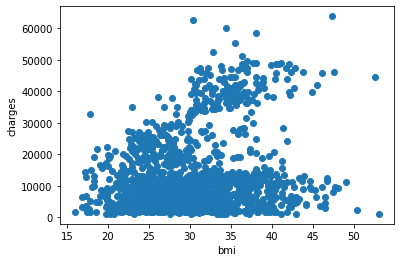

In [3]:
#using column bmi and charges to perfom simple linear regression
plt.scatter(data.bmi,data.charges)
plt.xlabel('bmi')
plt.ylabel('charges')
plt.show()

In [4]:
# Genrating basic loss function
def loss_function(m,b,points):
  total_error = 0
  for i in range(len(points)-300):
    x = points.iloc[i].bmi
    y = points.iloc[i].charges
    total_error += (y - (m+x+b))**2
  return(total_error/float(len(points)))




In [5]:
#Making a gradient decend algorithm
def gradient_dec(m_now,b_now,points,L):
  m_gradient = 0
  b_gradient = 0
   
  n = len(points)-300
  for i in range(n):
    x = points.iloc[i].bmi
    y = points.iloc[i].charges
    m_gradient +=-(2/n) * x * (y -(m_now*x+b_now))
    b_gradient +=-(2/n) * (y -(m_now*x+b_now))
  m =  m_now - m_gradient * L
  b =  b_now - b_gradient * L
  return m,b


In [6]:
#We define arbitary values for varialbles m and b and learning rate L
m = 0
b = 0
L = 0.0001
epoch = 30
for i in range (epoch):#training model
  print(f"Epoch:{i}")
  m,b = gradient_dec(m,b,data,L)

Epoch:0
Epoch:1
Epoch:2
Epoch:3
Epoch:4
Epoch:5
Epoch:6
Epoch:7
Epoch:8
Epoch:9
Epoch:10
Epoch:11
Epoch:12
Epoch:13
Epoch:14
Epoch:15
Epoch:16
Epoch:17
Epoch:18
Epoch:19
Epoch:20
Epoch:21
Epoch:22
Epoch:23
Epoch:24
Epoch:25
Epoch:26
Epoch:27
Epoch:28
Epoch:29


In [7]:
print (m,b)

425.4662936930021 13.70355290841051


In [8]:
loss = loss_function(m,b,data)
print(loss)

237696463.86305708


In [9]:
print(len(data))

1338


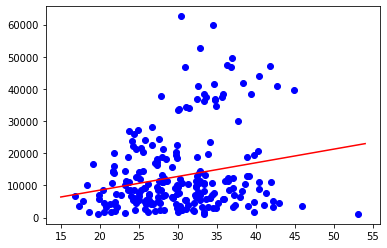

In [10]:
#Plotting linear regression line
plt.scatter(data.bmi[1100:1330],data.charges[1100:1330],color = "blue")
plt.plot(list(range(15,55)),[m*x+b for x in range(15,55)],color = "red")
plt.show()

# Using Sklear to verify results

In [11]:
import numpy as np
import seaborn as sns
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [12]:
df_binary = data[['bmi', 'charges']]
  
# Taking only the selected two attributes from the dataset
df_binary.columns = ['bmi', 'charges']
  
# Renaming the columns for easier writing of the code
df_binary.head()
  

,bmi,charges
0,27.900,16884.92400
1,33.770,1725.55230
2,33.000,4449.46200
3,22.705,21984.47061
4,28.880,3866.85520


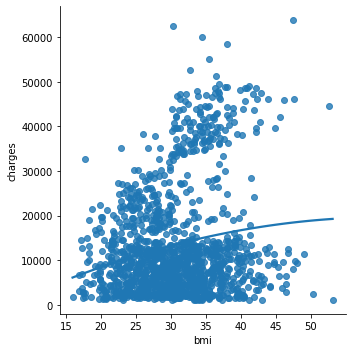

In [13]:
sns.lmplot(x ="bmi", y ="charges", data = df_binary, order = 2, ci = None)

In [14]:

# Eliminating NaN or missing input numbers
df_binary.fillna(method ='ffill', inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


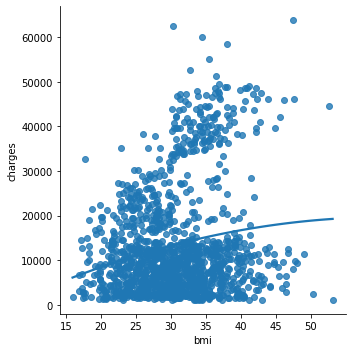

In [15]:
sns.lmplot(x ="bmi", y ="charges", data = df_binary, order = 2, ci = None)

In [17]:

X = np.array(df_binary['bmi']).reshape(-1, 1)
y = np.array(df_binary['charges']).reshape(-1, 1)
  
# Separating the data into independent and dependent variables
# Converting each dataframe into a numpy array 
# since each dataframe contains only one column
df_binary.dropna(inplace = True)

# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
  
# Splitting the data into training and testing data
regr = LinearRegression()
  
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.031840591415015496


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


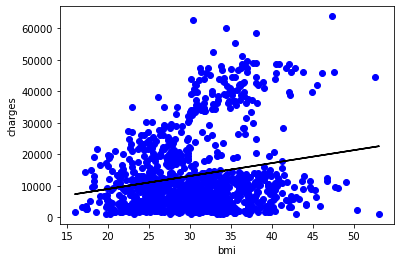

In [19]:

y_pred = regr.predict(X_train)
plt.scatter(X_train, y_train, color ='b')
plt.plot(X_train, y_pred, color ='k')
plt.xlabel('bmi')
plt.ylabel('charges')
plt.show()
# Data scatter of predicted values